[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/StadynR/HAR-imu-photogrammetry/blob/main/Notebooks/Dataset%201/Photogrammetry.ipynb)


# Dataset 1 - Photogrammetry

This notebook contains code and explanations for the training and testing of 7 different AI architectures for the task of Human Action Recognition using time series data obtained from photogrammetry data (body markers).

## Access to Google Drive and load dataset

You need to create a shortcut in your Drive home to this folder: https://drive.google.com/drive/folders/1k2sAkmRyyctE1uOc19mrixyt2N47-7pt?usp=share_link

In [1]:
#Drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Read document
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Datasets/Dataset 1/United Photogrammetry Movements.xlsx',sheet_name='Hoja1')
df


,labbel,Tiempo (s.),antebrazo_inf_x,antebrazo_inf_y,antebrazo_inf_z,antebrazo_med_x,antebrazo_med_y,antebrazo_med_z,antebrazo_sup_x,antebrazo_sup_y,...,hombro_ref_z,mano_x,mano_y,mano_z,muneca_ext_x,muneca_ext_y,muneca_ext_z,muneca_int_x,muneca_int_y,muneca_int_z
0,extension,0.000,0.693923,1.047535,0.944088,0.721272,1.049303,1.024746,0.648309,1.086814,...,1.455331,0.720022,1.008170,0.823845,0.735946,1.011931,0.915530,0.673161,1.030883,0.888559
1,extension,0.005,0.693949,1.047624,0.944110,0.721240,1.049328,1.024791,0.648273,1.086816,...,1.455319,0.719950,1.008028,0.823725,0.735936,1.012018,0.915561,0.673161,1.030883,0.888559
2,extension,0.010,0.693888,1.047661,0.944109,0.721232,1.049348,1.024816,0.648228,1.086831,...,1.455347,0.720022,1.008170,0.823845,0.735892,1.012170,0.915583,0.673161,1.030883,0.888559
3,extension,0.015,0.693888,1.047661,0.944109,0.721181,1.049419,1.024796,0.648228,1.086831,...,1.455349,0.719995,1.008329,0.823862,0.735892,1.012170,0.915583,0.673138,1.030931,0.888549
4,extension,0.020,0.693888,1.047661,0.944109,0.721122,1.049493,1.024806,0.648273,1.086962,...,1.455358,0.719977,1.008502,0.823958,0.735946,1.012235,0.915596,0.673212,1.031118,0.888518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313644,pronacion,89.980,0.826466,0.956291,0.915512,0.853146,0.946880,0.995450,0.809504,1.016040,...,1.432853,0.831781,0.908482,0.799228,0.845318,0.905071,0.890443,0.801561,0.953426,0.862579
313645,pronacion,89.985,0.826399,0.956343,0.915562,0.853032,0.946964,0.995395,0.809504,1.016040,...,1.432840,0.831757,0.908482,0.799268,0.845277,0.905089,0.890442,0.801524,0.953431,0.862607
313646,pronacion,89.990,0.826325,0.956407,0.915599,0.853191,0.947063,0.995458,0.809504,1.016040,...,1.432911,0.831757,0.908482,0.799268,0.845318,0.905071,0.890443,0.801488,0.953468,0.862684
313647,pronacion,89.995,0.826413,0.956443,0.915646,0.853168,0.947076,0.995526,0.809504,1.016040,...,1.432914,0.831757,0.908482,0.799268,0.845324,0.905100,0.890474,0.801605,0.953567,0.862604


## Dataset Information

In [3]:
#Data info
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313649 entries, 0 to 313648
Data columns (total 38 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   labbel           313649 non-null  object 
 1   Tiempo (s.)      313649 non-null  float64
 2   antebrazo_inf_x  313649 non-null  float64
 3   antebrazo_inf_y  313649 non-null  float64
 4   antebrazo_inf_z  313649 non-null  float64
 5   antebrazo_med_x  313649 non-null  float64
 6   antebrazo_med_y  313649 non-null  float64
 7   antebrazo_med_z  313649 non-null  float64
 8   antebrazo_sup_x  313649 non-null  float64
 9   antebrazo_sup_y  313649 non-null  float64
 10  antebrazo_sup_z  313649 non-null  float64
 11  brazo_inf_x      313649 non-null  float64
 12  brazo_inf_y      313649 non-null  float64
 13  brazo_inf_z      313649 non-null  float64
 14  brazo_med_x      313649 non-null  float64
 15  brazo_med_y      313649 non-null  float64
 16  brazo_med_z      313649 non-null  floa

(313649, 38)

### Dataset information plot

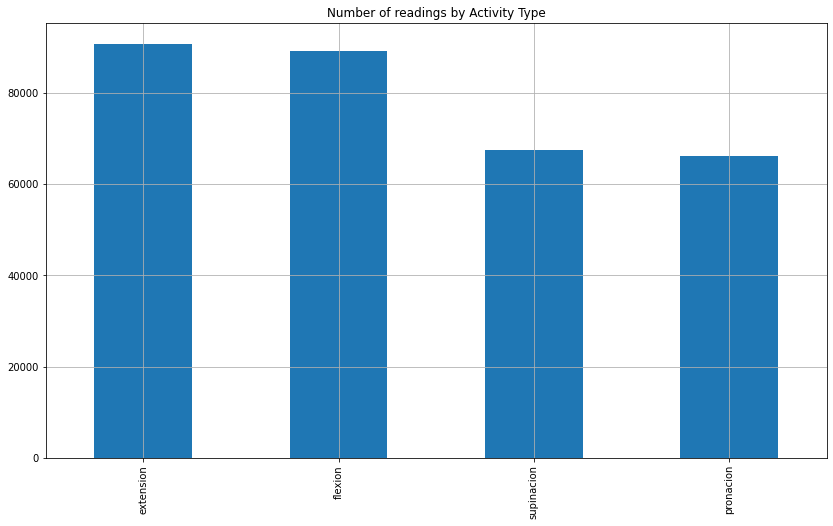

In [4]:
#Number of readings per activity
countOfActivities = df['labbel'].value_counts()
countOfActivities.plot(kind='bar',title='Number of readings by Activity Type',figsize=(14,8),grid=True);

In [5]:
#Visualization
def plot_activity(activity,df,start=0,stop=200):
  extractRowsOfActivity = (df['labbel'] == activity)  # Output will be true/false.
  data = df[extractRowsOfActivity] # data has only rows that are for the requested activity.
  data = data[['antebrazo_inf_x', 'antebrazo_inf_y' ,'antebrazo_inf_z', 'antebrazo_med_x','antebrazo_med_y','antebrazo_med_z', 'antebrazo_sup_x','antebrazo_sup_y','antebrazo_sup_z', 'brazo_inf_x', 'brazo_inf_y', 'brazo_inf_z', 'brazo_med_x', 'brazo_med_y', 'brazo_med_z', 'brazo_sup_x', 'brazo_sup_y', 'brazo_sup_z', 'codo_ext_x','codo_ext_y', 'codo_ext_z', 'codo_int_x', 'codo_int_y', 'codo_int_z', 'hombro_ref_x', 'hombro_ref_y', 'hombro_ref_z', 'mano_x', 'mano_y', 'mano_z', 'muneca_ext_x', 'muneca_ext_y', 'muneca_ext_z', 'muneca_int_x', 'muneca_int_y', 'muneca_int_z']] # data has only the accelerometer columns of one IMU.
  data = data[start:stop]
  
  ax = data.plot(subplots=True,figsize=(16,12),title=activity+ ', Start Row: '+str(start)+' Stop row: '+str(stop)) # Plot accelerometer for the activity.

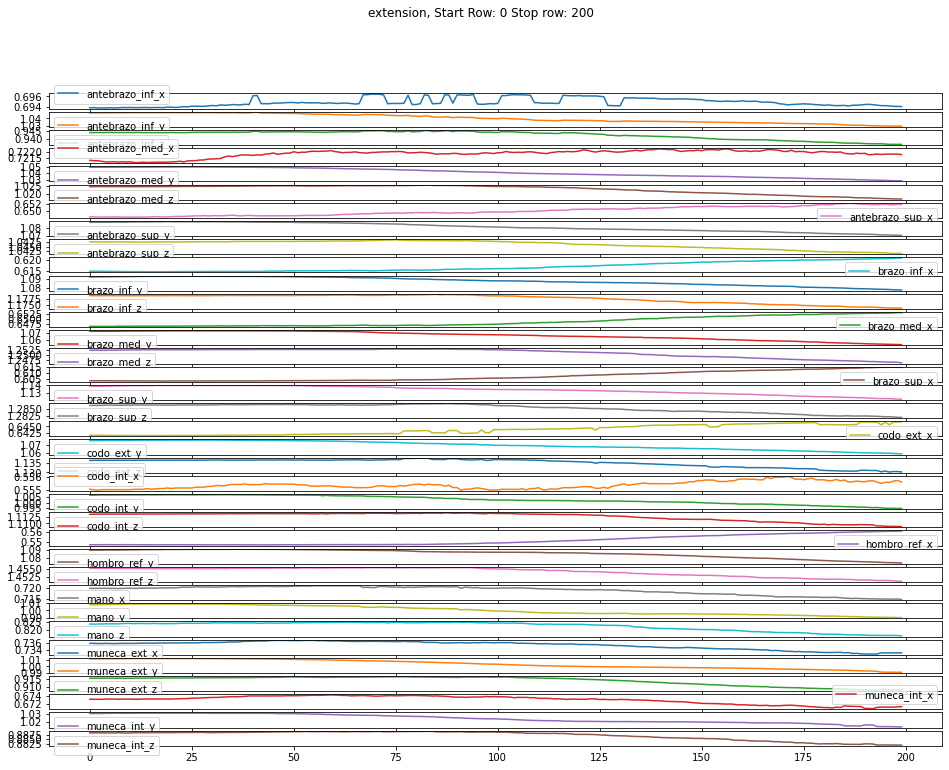

In [6]:
plot_activity('extension',df)

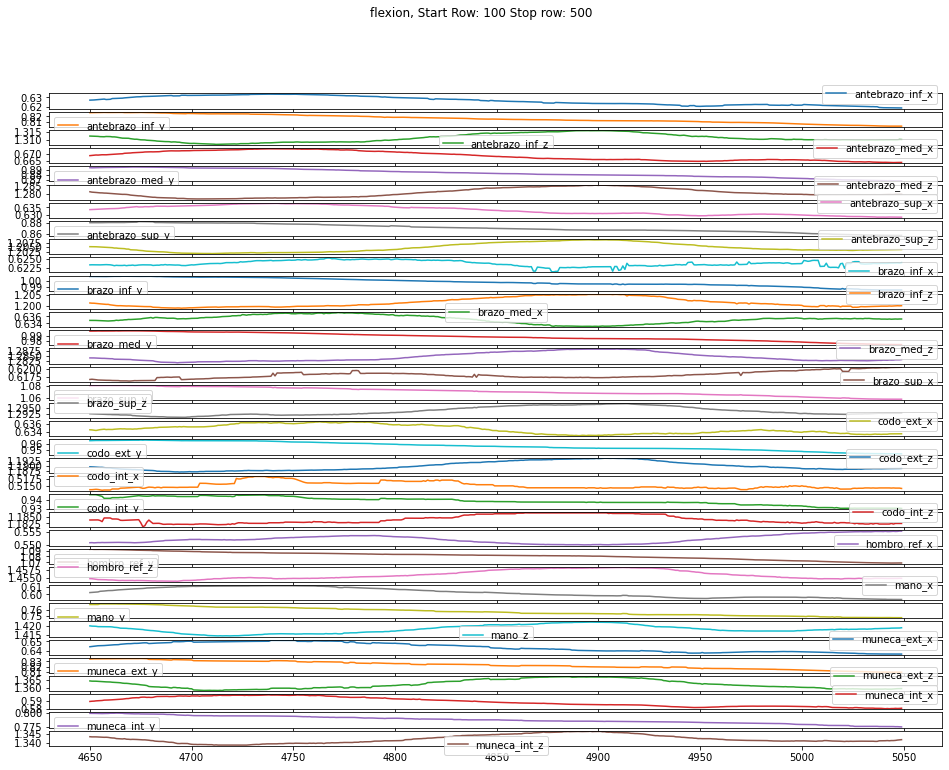

In [7]:
plot_activity('flexion',df,100,500)

## Preprocessing

- Normalizing the measurements to be between 0 and 1.
- Transforming the measurements to be in a 3-D array of [samples, timesteps,features].
- One hot encoding the activity names.
- Breaking the 3-D array into a training and test dataset. 

### Data Normalization

In [8]:
#NORMALIZATION
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df['antebrazo_inf_x_mms'] = mms.fit_transform(df[['antebrazo_inf_x']])
df['antebrazo_inf_y_mms'] = mms.fit_transform(df[['antebrazo_inf_y']])
df['antebrazo_inf_z_mms'] = mms.fit_transform(df[['antebrazo_inf_z']])

df['antebrazo_med_x_mms'] = mms.fit_transform(df[['antebrazo_med_x']])
df['antebrazo_med_y_mms'] = mms.fit_transform(df[['antebrazo_med_y']])
df['antebrazo_med_z_mms'] = mms.fit_transform(df[['antebrazo_med_z']])

df['antebrazo_sup_x_mms'] = mms.fit_transform(df[['antebrazo_sup_x']])
df['antebrazo_sup_y_mms'] = mms.fit_transform(df[['antebrazo_sup_y']])
df['antebrazo_sup_z_mms'] = mms.fit_transform(df[['antebrazo_sup_z']])

df['brazo_inf_x_mms'] = mms.fit_transform(df[['brazo_inf_x']])
df['brazo_inf_y_mms'] = mms.fit_transform(df[['brazo_inf_y']])
df['brazo_inf_z_mms'] = mms.fit_transform(df[['brazo_inf_z']])

df['brazo_med_x_mms'] = mms.fit_transform(df[['brazo_med_x']])
df['brazo_med_y_mms'] = mms.fit_transform(df[['brazo_med_y']])
df['brazo_med_z_mms'] = mms.fit_transform(df[['brazo_med_z']])

df['brazo_sup_x_mms'] = mms.fit_transform(df[['brazo_sup_x']])
df['brazo_sup_y_mms'] = mms.fit_transform(df[['brazo_sup_y']])
df['brazo_sup_z_mms'] = mms.fit_transform(df[['brazo_sup_z']])

df['codo_ext_x_mms'] = mms.fit_transform(df[['codo_ext_x']])
df['codo_ext_y_mms'] = mms.fit_transform(df[['codo_ext_y']])
df['codo_ext_z_mms'] = mms.fit_transform(df[['codo_ext_z']])

df['codo_int_x_mms'] = mms.fit_transform(df[['codo_int_x']])
df['codo_int_y_mms'] = mms.fit_transform(df[['codo_int_y']])
df['codo_int_z_mms'] = mms.fit_transform(df[['codo_int_z']])

df['hombro_ref_x_mms'] = mms.fit_transform(df[['hombro_ref_x']])
df['hombro_ref_y_mms'] = mms.fit_transform(df[['hombro_ref_y']])
df['hombro_ref_z_mms'] = mms.fit_transform(df[['hombro_ref_z']])

df['mano_x_mms'] = mms.fit_transform(df[['mano_x']])
df['mano_y_mms'] = mms.fit_transform(df[['mano_y']])
df['mano_z_mms'] = mms.fit_transform(df[['mano_z']])

df['muneca_ext_x_mms'] = mms.fit_transform(df[['muneca_ext_x']])
df['muneca_ext_y_mms'] = mms.fit_transform(df[['muneca_ext_y']])
df['muneca_ext_z_mms'] = mms.fit_transform(df[['muneca_ext_z']])

df['muneca_int_x_mms'] = mms.fit_transform(df[['muneca_int_x']])
df['muneca_int_y_mms'] = mms.fit_transform(df[['muneca_int_y']])
df['muneca_int_z_mms'] = mms.fit_transform(df[['muneca_int_z']])

df.describe().round(2)

,Tiempo (s.),antebrazo_inf_x,antebrazo_inf_y,antebrazo_inf_z,antebrazo_med_x,antebrazo_med_y,antebrazo_med_z,antebrazo_sup_x,antebrazo_sup_y,antebrazo_sup_z,...,hombro_ref_z_mms,mano_x_mms,mano_y_mms,mano_z_mms,muneca_ext_x_mms,muneca_ext_y_mms,muneca_ext_z_mms,muneca_int_x_mms,muneca_int_y_mms,muneca_int_z_mms
count,313649.00,313649.00,313649.00,313649.00,313649.00,313649.00,313649.00,313649.00,313649.00,313649.00,...,313649.00,313649.00,313649.00,313649.00,313649.00,313649.00,313649.00,313649.00,313649.00,313649.00
mean,42.22,0.72,0.93,1.11,0.75,0.98,1.14,0.72,1.01,1.10,...,0.57,0.48,0.56,0.50,0.46,0.50,0.51,0.49,0.51,0.50
std,25.74,0.07,0.10,0.14,0.07,0.10,0.10,0.07,0.11,0.06,...,0.16,0.22,0.23,0.33,0.23,0.22,0.32,0.24,0.24,0.32
min,0.00,0.57,0.73,0.89,0.63,0.80,0.97,0.59,0.82,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.73,0.66,0.83,0.93,0.70,0.90,1.01,0.65,0.91,1.04,...,0.43,0.34,0.36,0.06,0.31,0.32,0.08,0.31,0.27,0.08
50%,40.90,0.71,0.96,1.14,0.74,0.96,1.17,0.72,1.02,1.11,...,0.60,0.49,0.61,0.56,0.41,0.53,0.59,0.52,0.59,0.57
75%,63.88,0.77,1.01,1.23,0.80,1.04,1.22,0.79,1.09,1.15,...,0.69,0.62,0.73,0.82,0.61,0.67,0.81,0.70,0.70,0.78
max,90.00,0.86,1.14,1.33,0.89,1.21,1.30,0.85,1.25,1.22,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Transformation of dimensions as a 3D array

Considering the size of the dataset, a number of samples of 200 was considered enough to have good training and test sets

In [9]:
import numpy as np
from scipy import stats
nSamplesInEach = 200
nFeatures = 36
samples = []
labels = []
for i in range(0,len(df)-nSamplesInEach,nSamplesInEach):
  aix = df['antebrazo_inf_x_mms'].values[i:i+nSamplesInEach]
  aiy = df['antebrazo_inf_y_mms'].values[i:i+nSamplesInEach]
  aiz = df['antebrazo_inf_z_mms'].values[i:i+nSamplesInEach]
  
  amx = df['antebrazo_med_x_mms'].values[i:i+nSamplesInEach]
  amy = df['antebrazo_med_y_mms'].values[i:i+nSamplesInEach]
  amz = df['antebrazo_med_z_mms'].values[i:i+nSamplesInEach]

  asx = df['antebrazo_sup_x_mms'].values[i:i+nSamplesInEach]
  asy = df['antebrazo_sup_y_mms'].values[i:i+nSamplesInEach]
  asz = df['antebrazo_sup_z_mms'].values[i:i+nSamplesInEach]

  bix = df['brazo_inf_x_mms'].values[i:i+nSamplesInEach]
  biy = df['brazo_inf_y_mms'].values[i:i+nSamplesInEach]
  biz = df['brazo_inf_z_mms'].values[i:i+nSamplesInEach]
  
  bmx = df['brazo_med_x_mms'].values[i:i+nSamplesInEach]
  bmy = df['brazo_med_y_mms'].values[i:i+nSamplesInEach]
  bmz = df['brazo_med_z_mms'].values[i:i+nSamplesInEach]

  bsx = df['brazo_sup_x_mms'].values[i:i+nSamplesInEach]
  bsy = df['brazo_sup_y_mms'].values[i:i+nSamplesInEach]
  bsz = df['brazo_sup_z_mms'].values[i:i+nSamplesInEach]

  cex = df['codo_ext_x_mms'].values[i:i+nSamplesInEach]
  cey = df['codo_ext_y_mms'].values[i:i+nSamplesInEach]
  cez = df['codo_ext_z_mms'].values[i:i+nSamplesInEach]

  cix = df['codo_int_x_mms'].values[i:i+nSamplesInEach]
  ciy = df['codo_int_y_mms'].values[i:i+nSamplesInEach]
  ciz = df['codo_int_z_mms'].values[i:i+nSamplesInEach]

  hx = df['hombro_ref_x_mms'].values[i:i+nSamplesInEach]
  hy = df['hombro_ref_y_mms'].values[i:i+nSamplesInEach]
  hz = df['hombro_ref_z_mms'].values[i:i+nSamplesInEach]

  mx = df['mano_x_mms'].values[i:i+nSamplesInEach]
  my = df['mano_y_mms'].values[i:i+nSamplesInEach]
  mz = df['mano_z_mms'].values[i:i+nSamplesInEach]

  mex = df['muneca_ext_x_mms'].values[i:i+nSamplesInEach]
  mey = df['muneca_ext_y_mms'].values[i:i+nSamplesInEach]
  mez = df['muneca_ext_z_mms'].values[i:i+nSamplesInEach]

  mix = df['muneca_int_x_mms'].values[i:i+nSamplesInEach]
  miy = df['muneca_int_y_mms'].values[i:i+nSamplesInEach]
  miz = df['muneca_int_z_mms'].values[i:i+nSamplesInEach]

  label = stats.mode(df['labbel'][i:i+nSamplesInEach])
  label = label[0][0]

  samples.append([aix, aiy, aiz, amx, amy, amz, asx, asy, asz, bix, biy, biz, bmx, bmy, bmz, bsx, bsy, bsz, cex, cey, cez, cix, ciy, ciz, hx, hy, hz, mx, my, mz, mex, mey, mez, mix, miy, miz])
  labels.append(label)

# Dimensions of resulting tensor
np.array(samples).shape

<ipython-input-9-1d179a2cbb4e>:56: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['labbel'][i:i+nSamplesInEach])
<ipython-input-9-1d179a2cbb4e>:56: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  label = stats.mode(df['labbel'][i:i+nSamplesInEach])


(1568, 36, 200)

### Reshape

This is necessary so that the dimensions of the tensor are in the correct order, that is, to change the shape from (samples, features, timesteps) to (samples, timesteps, features).

In [10]:
reshaped_s = np.array(samples).reshape(-1,nSamplesInEach,nFeatures)
np.array(reshaped_s).shape

(1568, 200, 36)

In [11]:
# Length of dataset after preprocessing
print(len(reshaped_s))

1568


### Label Encoding

To make training easier, the labels are encoded to binary values, which are easier to process and map in a neural network.

In [12]:
#Labels 
orig_labels = list(dict.fromkeys(labels)) # Get unique labels
print(orig_labels)
labels[:10]

['extension', 'flexion', 'pronacion', 'supinacion']


['extension',
 'extension',
 'extension',
 'extension',
 'extension',
 'extension',
 'extension',
 'extension',
 'extension',
 'extension']

In [13]:
labels = np.array(pd.get_dummies(labels))
labels[:10]

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=uint8)

In [14]:
# Identify unique encoded labels
_, idx = np.unique(labels, axis=0, return_index=True)
encoded_labels = labels[np.sort(idx)]
print(encoded_labels)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [15]:
# Shape of the label list
labels.shape

(1568, 4)

## Creation of training, testing and validation splits



In [16]:
#Training and Test Data
#Split into Train and Test Data sets
#We'll use 80% of the measurements for training, 15% of that will go to validation.
#15% of the set will be destined to testing

from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(reshaped_s, labels, test_size=.15,random_state=4)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=.15,random_state=4)
len(X_train)

1132

In [17]:
len(X_val)

200

In [18]:
len(X_test)

236

### Samples per Class

Count of samples for each class for training and testing

In [19]:
# Count how many elements 
def class_count(split, classes):
  counts = []
  for i in classes:
    count = np.where((split == i).all(axis=1))[0].size  # count the number of times the row i in classes is present in the split array.
    counts.append(count)
  return counts

train_counts = class_count(Y_train, encoded_labels)
val_counts = class_count(Y_val, encoded_labels)
test_counts = class_count(Y_test, encoded_labels)

df = pd.DataFrame(list(zip(orig_labels, train_counts, val_counts, test_counts)), 
                  columns =['Class', 'Training','Validation', 'Testing'])

df.loc['Total'] = df.sum(numeric_only=True)
df.loc[:,'Total'] = df.sum(numeric_only=True, axis=1)
df

,Class,Training,Validation,Testing,Total
0,extension,335.0,54.0,63.0,452.0
1,flexion,325.0,51.0,72.0,448.0
2,pronacion,238.0,39.0,52.0,329.0
3,supinacion,234.0,56.0,49.0,339.0
Total,NaN,1132.0,200.0,236.0,1568.0


In [20]:
#Build the model
# Get the input shape -> (samples, time steps, features)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features,n_outputs))

n_timesteps: 200, n_features: 36, n_outputs: 4


## Architectures

### Architecture 1: LSTM(128) + Dropout + Fully Connected + Fully Connected

Source: https://www.analyticsvidhya.com/blog/2021/07/implementing-lstm-for-human-activity-recognition-using-smartphone-accelerometer-data/

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, Reshape

This simple architecture uses a LSTM layer of 128 neurons to process the time series data, then a dropout layer to prevent overfitting, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [22]:
model = Sequential()
# RNN layer
model.add(LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
# Dropout layer
model.add(Dropout(0.5)) 
# Dense layer with ReLu
model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(n_outputs, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               84480     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 92,996
Trainable params: 92,996
Non-trainable params: 0
_________________________________________________________________


#### Loss function and optimizer

**Loss function:** Categorical Cross Entropy

**Optimizer:** Adam

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Train the model

Train the model for 50 epochs in mini-batches of 32 samples. This is 50 iterations over all samples in the `x_train` and `y_train` tensors. While training, monitor the model's loss and accuracy on the samples from the validation set:

In [24]:
history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_val, Y_val), batch_size = 32, verbose = 1)

Epoch 1/50
36/36 [==============================] - 6s 29ms/step - loss: 1.0137 - accuracy: 0.5989 - val_loss: 0.6794 - val_accuracy: 0.7100
Epoch 2/50
36/36 [==============================] - 0s 12ms/step - loss: 0.6357 - accuracy: 0.7182 - val_loss: 0.6932 - val_accuracy: 0.7150
Epoch 3/50
36/36 [==============================] - 1s 15ms/step - loss: 0.5805 - accuracy: 0.7403 - val_loss: 0.6231 - val_accuracy: 0.7350
Epoch 4/50
36/36 [==============================] - 1s 16ms/step - loss: 0.5382 - accuracy: 0.7465 - val_loss: 0.5606 - val_accuracy: 0.7900
Epoch 5/50
36/36 [==============================] - 1s 16ms/step - loss: 0.5070 - accuracy: 0.7818 - val_loss: 0.4785 - val_accuracy: 0.8750
Epoch 6/50
36/36 [==============================] - 1s 16ms/step - loss: 0.4420 - accuracy: 0.8445 - val_loss: 0.3636 - val_accuracy: 0.8700
Epoch 7/50
36/36 [==============================] - 1s 17ms/step - loss: 0.4363 - accuracy: 0.8445 - val_loss: 0.4081 - val_accuracy: 0.8750
Epoch 8/50
36

#### Evaluate the model

In [25]:
results = model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1)
arch1_test_acc = results[1]
arch1_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

8/8 [==============================] - 0s 11ms/step - loss: 0.3852 - accuracy: 0.8517
Test Accuracy : 0.8516949415206909
Test Loss : 0.3851655423641205


#### Create a graph of accuracy and loss over time

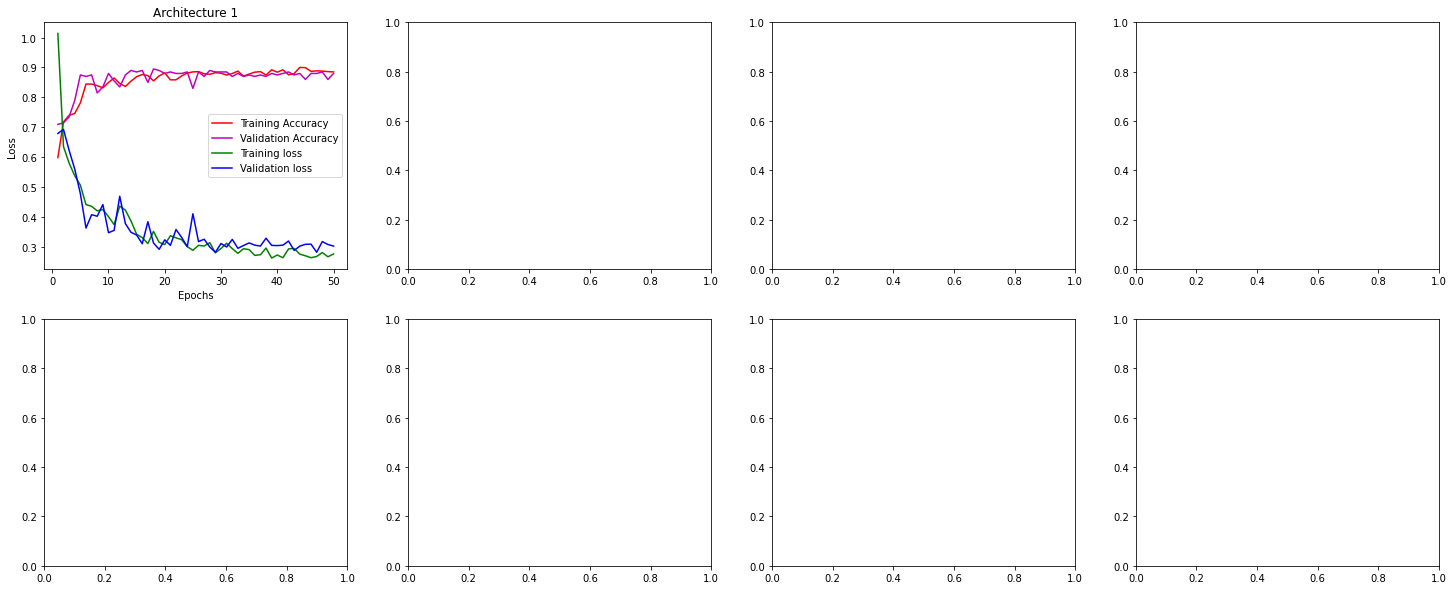

In [26]:
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch1_train_acc = acc[-1]
arch1_val_acc = val_acc[-1]
arch1_train_loss = loss[-1]
arch1_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)


# Create 7 subplots in a grid with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))

axes[0, 0].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 0].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[0, 0].plot(epochs, loss, 'g', label='Training loss')
axes[0, 0].plot(epochs, val_loss, 'b', label='Validation loss')
axes[0, 0].set_title("Architecture 1")
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

### Architecture 2: LSTM(128) + Dropout + LSTM(64) + Dropout + Fully Connected

Source: https://github.com/srvds/Human-Activity-Recognition

This architecture uses a LSTM layer of 128 neurons to process the time series data, then a dropout layer to prevent overfitting, another LSTM and another dropout layer for improving the previous architecture, and a fully connected layer to map the information from previous layers to the 4 outputs.

In [27]:
# Initiliazing the sequential model
model = keras.Sequential()
# Configuring the parameters
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# Adding a dropout layer
model.add(Dropout(0.5))
# Add a LSTM layer
model.add(LSTM(64))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_outputs, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 200, 128)          84480     
                                                                 
 dropout_1 (Dropout)         (None, 200, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 134,148
Trainable params: 134,148
Non-trainable params: 0
_________________________________________________________________


#### Loss function and training

In [28]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_val, Y_val), batch_size = 32, verbose = 1)

Epoch 1/50
36/36 [==============================] - 5s 42ms/step - loss: 1.0987 - accuracy: 0.5451 - val_loss: 0.7444 - val_accuracy: 0.6200
Epoch 2/50
36/36 [==============================] - 1s 17ms/step - loss: 0.6895 - accuracy: 0.6943 - val_loss: 0.6102 - val_accuracy: 0.6550
Epoch 3/50
36/36 [==============================] - 1s 17ms/step - loss: 0.6027 - accuracy: 0.7385 - val_loss: 0.5917 - val_accuracy: 0.7850
Epoch 4/50
36/36 [==============================] - 1s 17ms/step - loss: 0.5589 - accuracy: 0.7624 - val_loss: 0.5942 - val_accuracy: 0.7450
Epoch 5/50
36/36 [==============================] - 1s 17ms/step - loss: 0.5407 - accuracy: 0.7712 - val_loss: 0.5503 - val_accuracy: 0.7500
Epoch 6/50
36/36 [==============================] - 1s 17ms/step - loss: 0.4687 - accuracy: 0.8057 - val_loss: 0.4099 - val_accuracy: 0.8750
Epoch 7/50
36/36 [==============================] - 1s 17ms/step - loss: 0.4383 - accuracy: 0.8322 - val_loss: 0.5220 - val_accuracy: 0.8250
Epoch 8/50
36

#### Evaluate the model

In [29]:
#Evaluate the model
results = model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1)
arch2_test_acc = results[1]
arch2_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

8/8 [==============================] - 0s 11ms/step - loss: 0.3600 - accuracy: 0.8517
Test Accuracy : 0.8516949415206909
Test Loss : 0.360019713640213


#### Create a graph of accuracy and loss over time

In [30]:
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch2_train_acc = acc[-1]
arch2_val_acc = val_acc[-1]
arch2_train_loss = loss[-1]
arch2_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[0, 1].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 1].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[0, 1].plot(epochs, loss, 'g', label='Training loss')
axes[0, 1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[0, 1].set_title("Architecture 2")
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

In [31]:
axes[0, 1].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 1].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[0, 1].plot(epochs, loss, 'g', label='Training loss')
axes[0, 1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[0, 1].set_title("Architecture 2")
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

### Architecture 3: Conv1D(64) + Conv1D(64) + Dropout + Max Pooling + Flatten + Fully Connected + Fully Connected

Source: https://github.com/CDAC-lab/ETFA-Workshop/blob/main/CNN%20and%20LSTM%20for%20Human%20Activity%20Recognition.ipynb

This architecture focuses on convolutional neural networks. The first two layers are 1D convolutions of 64 filters, then a dropout layer to prevent overfitting, a max pooling layer to reduce dimensionality, a flatten layer to use dense layers, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [32]:
# Define the model
model = keras.Sequential()

# Add a 1D Convolutional layer with 32 filters and a kernel size of 3
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))

# Add a 1D Convolutional layer with 64 filters and a kernel size of 3
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))

# Add a Max Pooling layer with a pool size of 2
model.add(MaxPooling1D(pool_size=2))

# Add a Flatten layer
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(units=100, activation='relu'))

# Add an output layer
model.add(Dense(units=n_outputs, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 197, 64)           9280      
                                                                 
 conv1d_1 (Conv1D)           (None, 194, 64)           16448     
                                                                 
 dropout_3 (Dropout)         (None, 194, 64)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 97, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6208)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               620900    
                                                      

#### Loss function and training

In [33]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_val, Y_val), batch_size = 32, verbose = 1)

Epoch 1/50
36/36 [==============================] - 4s 26ms/step - loss: 0.6464 - accuracy: 0.7323 - val_loss: 0.4980 - val_accuracy: 0.8100
Epoch 2/50
36/36 [==============================] - 0s 6ms/step - loss: 0.4193 - accuracy: 0.8339 - val_loss: 0.4147 - val_accuracy: 0.8650
Epoch 3/50
36/36 [==============================] - 0s 6ms/step - loss: 0.3462 - accuracy: 0.8631 - val_loss: 0.3735 - val_accuracy: 0.8750
Epoch 4/50
36/36 [==============================] - 0s 6ms/step - loss: 0.3331 - accuracy: 0.8657 - val_loss: 0.3594 - val_accuracy: 0.8600
Epoch 5/50
36/36 [==============================] - 0s 7ms/step - loss: 0.3409 - accuracy: 0.8560 - val_loss: 0.3836 - val_accuracy: 0.8400
Epoch 6/50
36/36 [==============================] - 0s 7ms/step - loss: 0.3266 - accuracy: 0.8746 - val_loss: 0.3443 - val_accuracy: 0.8900
Epoch 7/50
36/36 [==============================] - 0s 6ms/step - loss: 0.3053 - accuracy: 0.8728 - val_loss: 0.3724 - val_accuracy: 0.8650
Epoch 8/50
36/36 [=

#### Evaluate the model

In [34]:
#Evaluate the model
results = model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1)
arch3_test_acc = results[1]
arch3_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

8/8 [==============================] - 0s 4ms/step - loss: 0.2663 - accuracy: 0.8941
Test Accuracy : 0.8940678238868713
Test Loss : 0.2663029730319977


#### Create a graph of accuracy and loss over time

In [35]:
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch3_train_acc = acc[-1]
arch3_val_acc = val_acc[-1]
arch3_train_loss = loss[-1]
arch3_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[0, 2].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 2].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[0, 2].plot(epochs, loss, 'g', label='Training loss')
axes[0, 2].plot(epochs, val_loss, 'b', label='Validation loss')
axes[0, 2].set_title("Architecture 3")
axes[0, 2].set_xlabel('Epochs')
axes[0, 2].set_ylabel('Loss')
axes[0, 2].legend()

### Architecture 4: Conv1D(32) + Max Pooling + LSTM(128) + Dropout + Fully Connected + Fully Connected

Source: None, the network was done empyrically

This architecture uses a 1D convolutional layer of 32 filters, then a max pooling layer to reduce dimensionality, a LSTM layer of 128 units, a dropout layer to prevent overfitting, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [36]:
# Define the model
model = keras.Sequential()

# Add a 1D Convolutional layer with 32 filters and a kernel size of 3
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))

# Add a Max Pooling layer with a pool size of 2
model.add(MaxPooling1D(pool_size=2))

# Add an LSTM layer with 128 units
model.add(LSTM(units=128))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))

# Add a fully connected layer
model.add(Dense(units=64, activation='relu'))

# Add an output layer
model.add(Dense(units=n_outputs, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 198, 32)           3488      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 99, 32)           0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 128)               82432     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 4)                 260       
                                                      

#### Loss Function and training

In [37]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_val, Y_val), batch_size = 32, verbose = 1)

Epoch 1/50
36/36 [==============================] - 4s 30ms/step - loss: 1.2094 - accuracy: 0.5009 - val_loss: 0.8203 - val_accuracy: 0.7100
Epoch 2/50
36/36 [==============================] - 0s 10ms/step - loss: 0.7125 - accuracy: 0.6979 - val_loss: 0.6930 - val_accuracy: 0.7050
Epoch 3/50
36/36 [==============================] - 0s 11ms/step - loss: 0.6529 - accuracy: 0.7032 - val_loss: 0.6282 - val_accuracy: 0.7650
Epoch 4/50
36/36 [==============================] - 0s 10ms/step - loss: 0.5757 - accuracy: 0.7562 - val_loss: 0.5885 - val_accuracy: 0.7450
Epoch 5/50
36/36 [==============================] - 0s 11ms/step - loss: 0.5772 - accuracy: 0.7527 - val_loss: 0.6738 - val_accuracy: 0.6450
Epoch 6/50
36/36 [==============================] - 0s 10ms/step - loss: 0.5185 - accuracy: 0.7942 - val_loss: 0.4499 - val_accuracy: 0.8750
Epoch 7/50
36/36 [==============================] - 0s 10ms/step - loss: 0.4795 - accuracy: 0.8269 - val_loss: 0.4829 - val_accuracy: 0.8350
Epoch 8/50
36

#### Evaluate the model

In [38]:
#Evaluate the model
results = model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1)
arch4_test_acc = results[1]
arch4_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

8/8 [==============================] - 0s 6ms/step - loss: 0.3957 - accuracy: 0.8517
Test Accuracy : 0.8516949415206909
Test Loss : 0.39568522572517395


#### Create a graph of accuracy and loss over time

In [39]:
#Create a graph of accuracy and loss over time
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch4_train_acc = acc[-1]
arch4_val_acc = val_acc[-1]
arch4_train_loss = loss[-1]
arch4_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[0, 3].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 3].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[0, 3].plot(epochs, loss, 'g', label='Training loss')
axes[0, 3].plot(epochs, val_loss, 'b', label='Validation loss')
axes[0, 3].set_title("Architecture 4")
axes[0, 3].set_xlabel('Epochs')
axes[0, 3].set_ylabel('Loss')
axes[0, 3].legend()

### Architecture 5: Conv1D(32) + Conv1D(64) + Max Pooling + Bidirectional LSTM(128) + Dropout + Fully Connected + Fully Connected

Source: One of the papers suggested using bidirectional LSTM as an improvement for HAR, the added convolutional layers are for testing

This architecture uses two layers of 1D convolutions, one using 32 filters and the other using 64 filters, then a max pooling layer to reduce dimensionality, a bidirectional LSTM of 128 neurons, a dropout layer to prevent overfitting, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [40]:
from keras.layers import Bidirectional, Attention

# Define the model
model = keras.Sequential()

# Add a 1D Convolutional layer with 32 filters and a kernel size of 3
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))

# Add a second 1D Convolutional layer with 64 filters and a kernel size of 3
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Add a Max Pooling layer with a pool size of 2
model.add(MaxPooling1D(pool_size=2))

# Add a bidirectional LSTM layer with 128 units
model.add(Bidirectional(LSTM(units=128)))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))

# Add a fully connected layer
model.add(Dense(units=64, activation='relu'))

# Add an output layer
model.add(Dense(units=n_outputs, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 198, 32)           3488      
                                                                 
 conv1d_4 (Conv1D)           (None, 196, 64)           6208      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 98, 64)           0         
 1D)                                                             
                                                                 
 bidirectional (Bidirectiona  (None, 256)              197632    
 l)                                                              
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 64)               

#### Loss function and training

In [41]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_val, Y_val), batch_size = 32, verbose = 1)

Epoch 1/50
36/36 [==============================] - 7s 53ms/step - loss: 1.0887 - accuracy: 0.5557 - val_loss: 0.8543 - val_accuracy: 0.5600
Epoch 2/50
36/36 [==============================] - 1s 14ms/step - loss: 0.7217 - accuracy: 0.6634 - val_loss: 0.6490 - val_accuracy: 0.7050
Epoch 3/50
36/36 [==============================] - 1s 14ms/step - loss: 0.6086 - accuracy: 0.7191 - val_loss: 0.6004 - val_accuracy: 0.6850
Epoch 4/50
36/36 [==============================] - 1s 15ms/step - loss: 0.5575 - accuracy: 0.7350 - val_loss: 0.5760 - val_accuracy: 0.7250
Epoch 5/50
36/36 [==============================] - 1s 15ms/step - loss: 0.4795 - accuracy: 0.8083 - val_loss: 0.4890 - val_accuracy: 0.8350
Epoch 6/50
36/36 [==============================] - 1s 14ms/step - loss: 0.4196 - accuracy: 0.8516 - val_loss: 0.3795 - val_accuracy: 0.8700
Epoch 7/50
36/36 [==============================] - 1s 15ms/step - loss: 0.4329 - accuracy: 0.8286 - val_loss: 0.3869 - val_accuracy: 0.8600
Epoch 8/50
36

#### Evaluate the model

In [42]:
#Evaluate the model
results = model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1)
arch5_test_acc = results[1]
arch5_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

8/8 [==============================] - 0s 6ms/step - loss: 0.3226 - accuracy: 0.8898
Test Accuracy : 0.8898305296897888
Test Loss : 0.3225589096546173


#### Create a graph of accuracy and loss over time


In [43]:
#Create a graph of accuracy and loss over time
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch5_train_acc = acc[-1]
arch5_val_acc = val_acc[-1]
arch5_train_loss = loss[-1]
arch5_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[1, 0].plot(epochs, acc , 'r', label='Training Accuracy')
axes[1, 0].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[1, 0].plot(epochs, loss, 'g', label='Training loss')
axes[1, 0].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1, 0].set_title("Architecture 5")
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

### Architecture 6: LSTM(128) + Dropout + Reshape + Conv1D(32) + Dropout + Flatten + Fully Connected + Fully Connected

Source: Empyrical adaptation of the architechture of the model with convolutional layers at the start

The final architecture starts with a LSTM layer, followed by a dropout layer to avoid overfitting and a reshape layer in order to use a convolutional layer. The next layer is a 1D convolution with 32 filters, followed by another dropout layer, and a flatter layer in order to use dense layers. The last two layers are fully connected layers in order to map the information from previous layers to the 4 outputs.

In [44]:
# Define the model
model = keras.Sequential()

# Add an LSTM layer with 128 units
model.add(LSTM(units=128, input_shape=(n_timesteps, n_features)))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))

# Reshape the input data to the correct shape for the Conv1D layer
model.add(Reshape((-1, 128)))

# Add a 1D Convolutional layer with 32 filters and a kernel size of 3
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='causal'))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))

# Add a Flatten layer
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(units=64, activation='relu'))

# Add an output layer
model.add(Dense(units=n_outputs, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 128)               84480     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 reshape (Reshape)           (None, 1, 128)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 1, 32)             12320     
                                                                 
 dropout_7 (Dropout)         (None, 1, 32)             0         
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 64)               

#### Loss function and training

In [45]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_val, Y_val), batch_size = 32, verbose = 1)

Epoch 1/50
36/36 [==============================] - 4s 33ms/step - loss: 1.2330 - accuracy: 0.4249 - val_loss: 0.9695 - val_accuracy: 0.5050
Epoch 2/50
36/36 [==============================] - 0s 13ms/step - loss: 0.8451 - accuracy: 0.6608 - val_loss: 0.7509 - val_accuracy: 0.6400
Epoch 3/50
36/36 [==============================] - 0s 13ms/step - loss: 0.7689 - accuracy: 0.6776 - val_loss: 0.6462 - val_accuracy: 0.7250
Epoch 4/50
36/36 [==============================] - 0s 14ms/step - loss: 0.6863 - accuracy: 0.7058 - val_loss: 0.6374 - val_accuracy: 0.7100
Epoch 5/50
36/36 [==============================] - 0s 14ms/step - loss: 0.6531 - accuracy: 0.7147 - val_loss: 0.6232 - val_accuracy: 0.7550
Epoch 6/50
36/36 [==============================] - 0s 13ms/step - loss: 0.6325 - accuracy: 0.7217 - val_loss: 0.5856 - val_accuracy: 0.7450
Epoch 7/50
36/36 [==============================] - 0s 12ms/step - loss: 0.5916 - accuracy: 0.7350 - val_loss: 0.6011 - val_accuracy: 0.7250
Epoch 8/50
36

#### Evaluate the model

In [46]:
#Evaluate the model
results = model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1)
arch6_test_acc = results[1]
arch6_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

8/8 [==============================] - 0s 6ms/step - loss: 0.6258 - accuracy: 0.7288
Test Accuracy : 0.7288135886192322
Test Loss : 0.6257636547088623


#### Create a graph of accuracy and loss over time

In [47]:
#Create a graph of accuracy and loss over time
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch6_train_acc = acc[-1]
arch6_val_acc = val_acc[-1]
arch6_train_loss = loss[-1]
arch6_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[1, 1].plot(epochs, acc , 'r', label='Training Accuracy')
axes[1, 1].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[1, 1].plot(epochs, loss, 'g', label='Training loss')
axes[1, 1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1, 1].set_title("Architecture 6")
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

### Architecture 7: LSTM(64) + Dropout + Fully Connected + Fully Connected + Fully Connected

Source: 

The final architecture is a very simple one, starting with a LSTM layer, followed by a dropout layer to avoid overfitting and three fully connected layers in order to map the information from previous layers to the 4 outputs.

In [48]:
#Second try a modeling
model = keras.Sequential()
model.add(LSTM(64,input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))


#### Loss function and training

In [49]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_val, Y_val), batch_size = 32, verbose = 1)

Epoch 1/50
36/36 [==============================] - 4s 41ms/step - loss: 1.1353 - accuracy: 0.5115 - val_loss: 0.8516 - val_accuracy: 0.5850
Epoch 2/50
36/36 [==============================] - 0s 12ms/step - loss: 0.6851 - accuracy: 0.7120 - val_loss: 0.6024 - val_accuracy: 0.8500
Epoch 3/50
36/36 [==============================] - 0s 13ms/step - loss: 0.6233 - accuracy: 0.7403 - val_loss: 0.6138 - val_accuracy: 0.7650
Epoch 4/50
36/36 [==============================] - 0s 13ms/step - loss: 0.5454 - accuracy: 0.7853 - val_loss: 0.4792 - val_accuracy: 0.8550
Epoch 5/50
36/36 [==============================] - 0s 12ms/step - loss: 0.5469 - accuracy: 0.8039 - val_loss: 0.4941 - val_accuracy: 0.8100
Epoch 6/50
36/36 [==============================] - 0s 12ms/step - loss: 0.4616 - accuracy: 0.8366 - val_loss: 0.4135 - val_accuracy: 0.8750
Epoch 7/50
36/36 [==============================] - 0s 12ms/step - loss: 0.4392 - accuracy: 0.8348 - val_loss: 0.4337 - val_accuracy: 0.8650
Epoch 8/50
36

#### Evaluate the model

In [50]:
#Evaluate the model
results = model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1)
arch7_test_acc = results[1]
arch7_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

8/8 [==============================] - 0s 9ms/step - loss: 0.3542 - accuracy: 0.8475
Test Accuracy : 0.8474576473236084
Test Loss : 0.3541734218597412


#### Create a graph of accuracy and loss over time

In [51]:
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch7_train_acc = acc[-1]
arch7_val_acc = val_acc[-1]
arch7_train_loss = loss[-1]
arch7_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[1, 2].plot(epochs, acc , 'r', label='Training Accuracy')
axes[1, 2].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[1, 2].plot(epochs, loss, 'g', label='Training loss')
axes[1, 2].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1, 2].set_title("Architecture 7")
axes[1, 2].set_xlabel('Epochs')
axes[1, 2].set_ylabel('Loss')
axes[1, 2].legend()

## Table Comparison of accuracies of the 6 architechtures

After training and testing all the architectures and obtaining their accuracy and loss values, the obtained results are presented in a table to compare the performance of each architecture in the dataset.

In [52]:
# Architectures labels
archs = ["Architecture 1", "Architecture 2", "Architecture 3", "Architecture 4", "Architecture 5", "Architecture 6", "Architecture 7"]
# Training accuracies of the architectures
train_accs = [arch1_train_acc, arch2_train_acc, arch3_train_acc, arch4_train_acc, arch5_train_acc, arch6_train_acc, arch7_train_acc]
# Training losses of the architectures
train_losses = [arch1_test_loss, arch2_test_loss, arch3_test_loss, arch4_test_loss, arch5_test_loss, arch6_test_loss, arch7_train_loss]
# Validation accuracies of the architectures
val_accs = [arch1_val_acc, arch2_val_acc, arch3_val_acc, arch4_val_acc, arch5_val_acc, arch6_val_acc, arch7_val_acc]
# Validation losses of the architectures
val_losses = [arch1_val_loss, arch2_val_loss, arch3_val_loss, arch4_val_loss, arch5_val_loss, arch6_val_loss, arch7_val_loss]
# Testing accuracies of the architectures
test_accs = [arch1_test_acc, arch2_test_acc, arch3_test_acc, arch4_test_acc, arch5_test_acc, arch6_test_acc, arch7_test_acc]
# Testing losses of the architectures
test_loss = [arch1_test_loss, arch2_test_loss, arch3_test_loss, arch4_test_loss, arch5_test_loss, arch6_test_loss, arch6_test_loss]

df = pd.DataFrame(list(zip(archs, train_accs, train_losses, val_accs, val_losses, test_accs, test_loss)), 
                  columns =['Architectures', 'Training Accuracy', 'Training Loss', 'Validation Accuracy', 'Validation Loss', 'Test Accuracy', 'Test Loss'])
df

# Defining custom function which returns 
# the list for df.style.apply() method
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: %s' % 'bold' if cell else '' for cell in is_max]


# Defining custom function which returns 
# the list for df.style.apply() method
def highlight_min(s):
    is_min = s == s.min()
    return ['font-weight: %s' % 'bold' if cell else '' for cell in is_min]
  
df.style.apply(highlight_max, subset = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']).apply(highlight_min, subset = ['Training Loss', 'Validation Loss', 'Test Loss'])

,Architectures,Training Accuracy,Training Loss,Validation Accuracy,Validation Loss,Test Accuracy,Test Loss
0,Architecture 1,0.885159,0.385166,0.880000,0.303392,0.851695,0.385166
1,Architecture 2,0.900177,0.360020,0.880000,0.310255,0.851695,0.360020
2,Architecture 3,0.924028,0.266303,0.875000,0.276480,0.894068,0.266303
3,Architecture 4,0.884276,0.395685,0.870000,0.334098,0.851695,0.395685
4,Architecture 5,0.888693,0.322559,0.885000,0.309887,0.889831,0.322559
5,Architecture 6,0.753534,0.625764,0.740000,0.557787,0.728814,0.625764
6,Architecture 7,0.881625,0.285416,0.885000,0.314092,0.847458,0.625764


## Plot of the Performance of Every Architecture

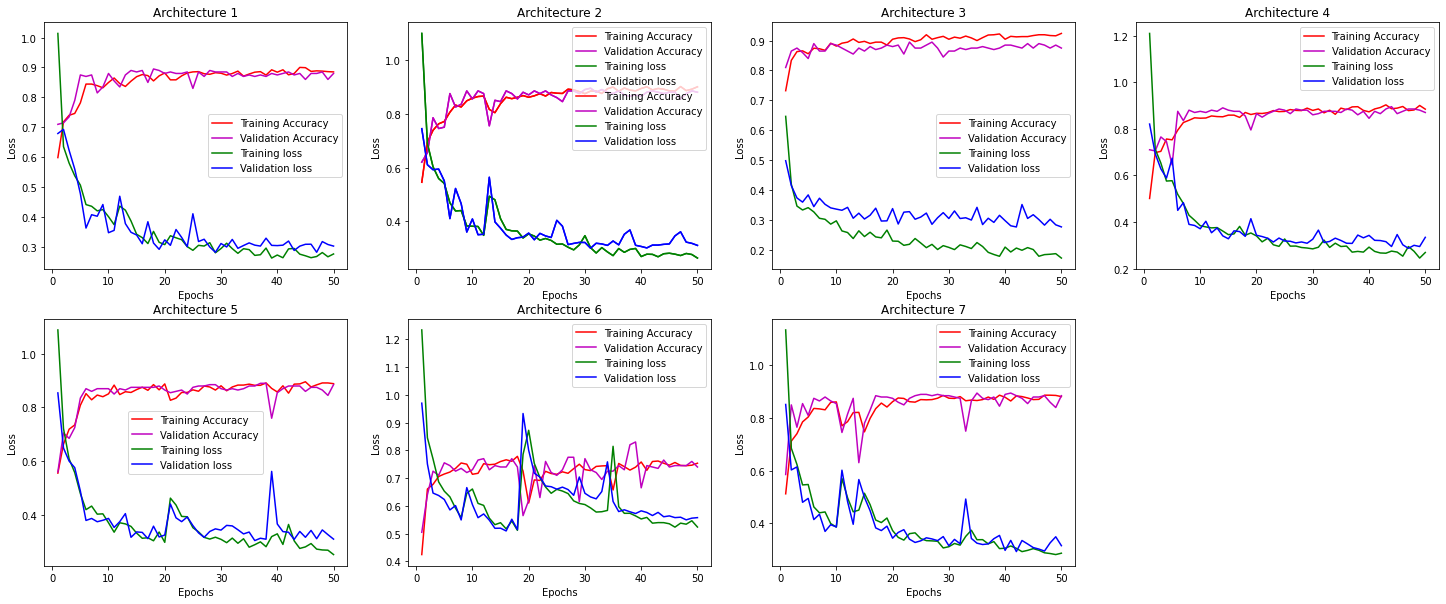

In [53]:
from IPython.display import display
axes[1, 3].axis('off')
display(fig)

## Plot of Best Architecture

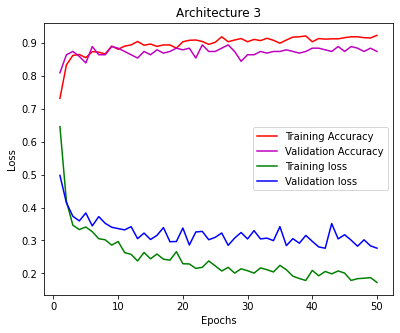

In [54]:
best = 3

if (best <= 4):
  best_x = 0
  best_y = best - 1
else:
  best_x = 1
  best_y = (best - 1) - 4

# Set the spacing between subplots to zero
fig.subplots_adjust(wspace=0, hspace=0)

# Hide the other subplots
for i in range(2):
    for j in range(4):
        if i != best_x or j != best_y:
            axes[i, j].set_visible(False)

display(axes[best_x, best_y].figure)